In [8]:
import pandas as pd

df = pd.read_excel('data/dados_cerveja_nota.xlsx')

df

,id,cerveja,nota
0,1,1,0.75
1,2,1,3.00
2,3,2,1.75
3,4,3,1.75
4,5,4,4.20
5,6,4,6.50
6,7,5,2.90
7,8,6,6.20
8,9,6,7.00
9,10,7,6.20


In [9]:
df['aprovado'] = (df['nota'] > 5).astype(int)

df

,id,cerveja,nota,aprovado
0,1,1,0.75,0
1,2,1,3.00,0
2,3,2,1.75,0
3,4,3,1.75,0
4,5,4,4.20,0
5,6,4,6.50,1
6,7,5,2.90,0
7,8,6,6.20,1
8,9,6,7.00,1
9,10,7,6.20,1


Text(0, 0.5, 'Aprovado')

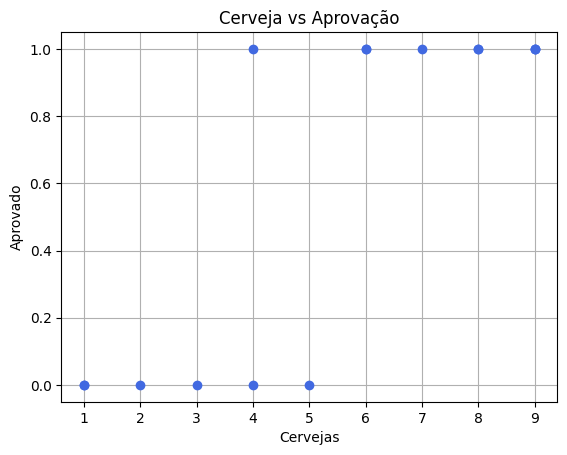

In [15]:
import matplotlib.pyplot as plt

plt.plot(df['cerveja'], df['aprovado'], 'o', color='royalblue')
plt.grid(True)
plt.title('Cerveja vs Aprovação')
plt.xlabel('Cervejas')
plt.ylabel('Aprovado')


In [21]:
from sklearn import linear_model

reg = linear_model.LogisticRegression(penalty=None, 
                                      fit_intercept=True)

reg.fit(df[['cerveja']], df['aprovado'])

LogisticRegression(penalty=None)

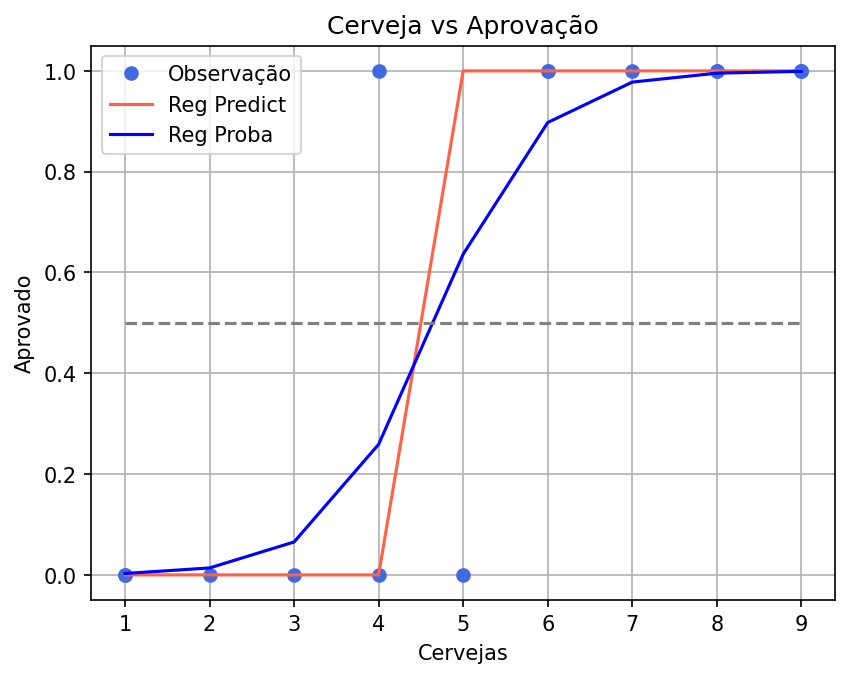

In [35]:
reg_predict = reg.predict(df[['cerveja']].drop_duplicates())
reg_prob = reg.predict_proba(df[['cerveja']].drop_duplicates())[:,1]

plt.figure(dpi=150)
plt.plot(df['cerveja'], df['aprovado'], 'o', color='royalblue')
plt.grid(True)
plt.title('Cerveja vs Aprovação')
plt.xlabel('Cervejas')
plt.ylabel('Aprovado')
plt.plot(df['cerveja'].drop_duplicates(), reg_predict, color='tomato')
plt.plot(df['cerveja'].drop_duplicates(), reg_prob, color='blue')
plt.hlines(0.5, xmin=1, xmax=9, linestyles='--', color='gray')

plt.legend(['Observação', 'Reg Predict', 'Reg Proba'])